# Predicting Credit Card Customer Churn using Dimensionality Reduction and Classification Models

Customer churn is a common challenge for businesses such as banks to retain their credit card customers. This project aims to identify customers at risk of churning, enabling banks to proactively target and potentially retain these customers through tailored strategies. This project will first introduce and visualize the customer dataset to provide insights into patterns that may influence churn. 

To capture the most significant patterns and reduce the complexity of the customer data, we will apply three dimensionality reduction methods: `Principal Component Analysis (PCA)`, `Kernel PCA (RBF and Linear kernels)`, and `Autoencoders`. These methods are evaluated based on their ability to capture the dataset's variance and minimize reconstruction error, striking a balance between representability and complexity.

We will then predict credit card customer churn using a variety of classification models: `Logistic Regression`, `Support Vector Machine (RBF and Linear kernels)`, `Decision Tree` and `Random Forest`. Cross-validation will be used to assess the performance of each model, with log-loss as the evaluation metric. By training models with both reduced and original feature sets, we aim to measure the impact of dimensionality reduction on model performance and identify the most effective approach to predicting churn.

## Load Libraries
To run this project, several machine learning and general-purpose libraries such as scikit-learn, tensorflow, and matplotlib need to be installed. Following commands can be run to install the required libraries:

```python
# Install data manipulation and visualization libraries
pip install numpy pandas matplotlib seaborn

# Install machine learning libraries
pip install scikit-learn tensorflow keras
```


In [1]:
# Load libraries
## Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## Data manipulation and dataframes
import numpy as np
import pandas as pd

## Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing, cross validation and evaluation metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer, log_loss

## Dimensionality reduction (PCA, KernelPCA)
from sklearn.decomposition import PCA, KernelPCA

## Dimensionality reduction (Autoencoders-Neural Network)
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.initializers import GlorotUniform

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

## Introduction to Dataset
The credit card customer dataset used in this project is sourced from [Kaggle](https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers/data). It contains data on 10,127 credit card customers with 23 columns, the last two columns is to remove, as suggested by the Author, to improve data quality and focus on relevant features.

#### <u> Data fields in the dataset </u>
1. **CLIENTNUM** : Client number, which is the unique identifier of the customer holding the account
2. **Attrition_Flag** : Indicating if the customer is an existing or attrited customer
3. **Customer Age** : Customer's age in years
4. **Gender** : Customer's gender
5. **Dependent_Count** : Number of dependents of the customer
6. **Education_Level** : Education qualification of the customer
7. **Marital_Status** : Marital status of the customer
8. **Income_Category** : Annual income category of the customer
9. **Card_Category** : Type of card held by the customer
10. **Months_on_book** : Duration of relationship with the bank in months
11. **Total_Relationship_Count** : Total number of products held by the customer
12. **Months_Inactive_12_mon** : Number of months inactive in the last 12 months
13. **Contacts_Count_12_mon** : Number of contacts in the last 12 months
14. **Credit_Limit** : Credit limit on the credit card
15. **Total_Revolving_Bal** : Total revolving balance on the credit card
16. **Avg_Open_To_Buy** : Average open to buy credit line (available credit) in the last 12 months
17. **Total_Amt_Chng_Q4_Q1** : Change in transaction amount (Q4 over Q1)
18. **Total_Trans_Amt** : Total transaction amount of last 12 months
19. **Total_Trans_Ct** : Total transaction count of last 12 months
20. **Total_Ct_Chng_Q4_Q1** : Change in transaction count (Q4 over Q1)
21. **Avg_Utilization_Ratio** : Average card utilization ratio

In [2]:
# Load Data
df = pd.read_csv('BankChurners.csv')

# Remove the last 2 columns
df = df.iloc[:,:-2]

In [3]:
# First 5 rows of the dataset
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [4]:
# Descriptive summary for numerical variables
df.iloc[:,1:].describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


## Visualization

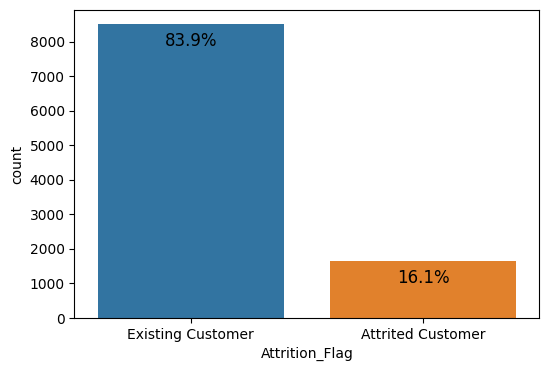

In [5]:
# Calculate the percentage of attrited customers
counts = df['Attrition_Flag'].value_counts()
percentages = (counts / counts.sum()) * 100

# Plot by count
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Attrition_Flag', hue ='Attrition_Flag')

# Annotate bars with percentage
for p, percentage in zip(ax.patches, percentages):
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width()/2, p.get_height()-200), 
                ha='center', va='top', fontsize=12, color='black')

plt.show() 

Only **16.1%** of the customers have attrited, indicating that the majority of customers remain active with the bank. This suggests that customer retention is relatively strong, but we should still focus on the 16.1% of the customers who have left to improve the retention strategies.

### Customer Demographics

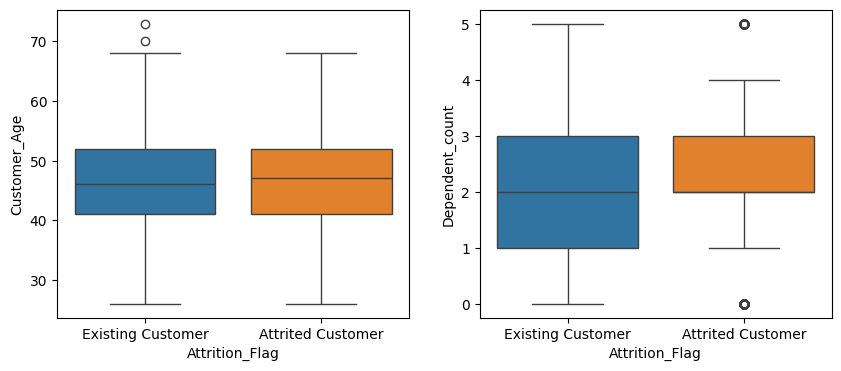

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.boxplot(x='Attrition_Flag', 
            y='Customer_Age',
            hue='Attrition_Flag', 
            data=df,
            ax=ax[0])

sns.boxplot(x='Attrition_Flag', 
            y='Dependent_count',
            hue='Attrition_Flag', 
            data=df,
            ax=ax[1])

plt.show()

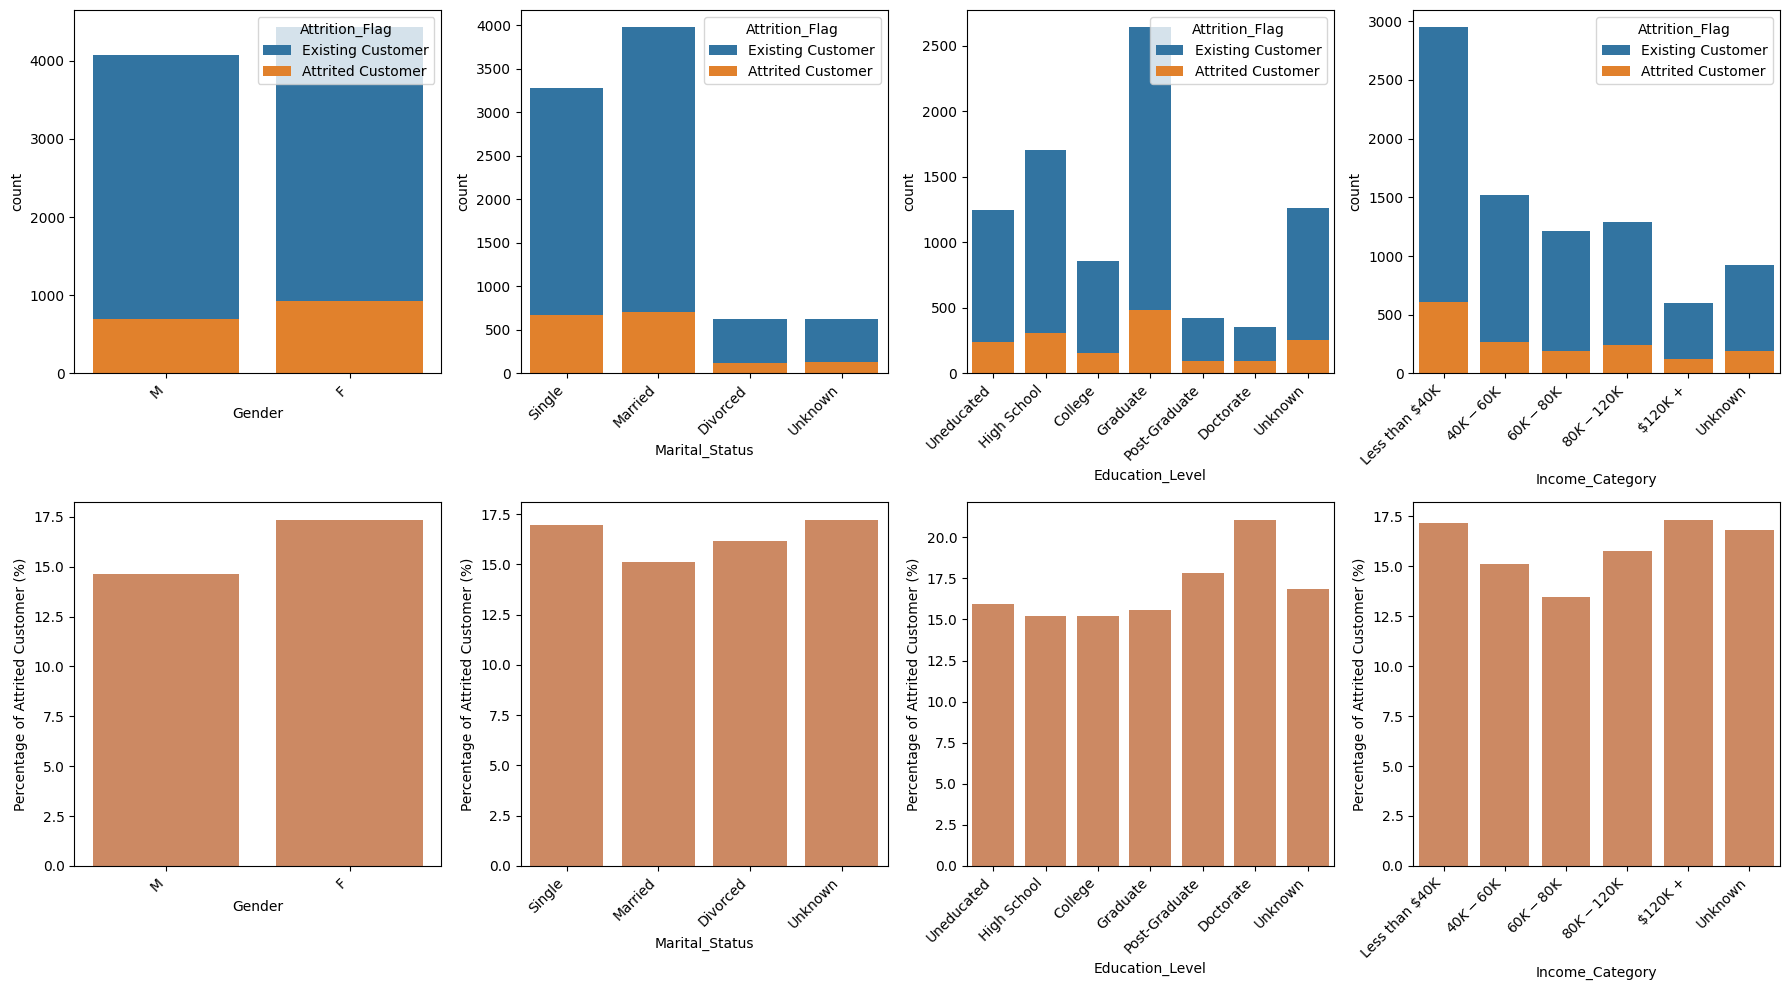

In [7]:
# List of fields with the categories ordered
categories = {
    'Gender': ['M','F'],
    'Marital_Status': ['Single', 'Married', 'Divorced', 'Unknown'],
    'Education_Level': ['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'],
    'Income_Category': ['Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +', 'Unknown']
}

fig, ax = plt.subplots(2, 4, figsize=(18,10))
for i, (category, order) in enumerate(categories.items()):
    # Plot by count
    sns.countplot(data=df, 
                  x=category, 
                  hue="Attrition_Flag", 
                  dodge=False,
                  order=order,
                  ax=ax[0,i])

    # Plot by percentage
    proportions = df.groupby(category)['Attrition_Flag'].value_counts(normalize=True).unstack() * 100
    sns.barplot(x=proportions.index, 
                y=proportions['Attrited Customer'], 
                color='#dd8452',
                order=order,
                ax=ax[1,i])
    ax[1,i].set_ylabel('Percentage of Attrited Customer (%)')
    
    #Adjust xtick labels
    ax[0,i].set_xticklabels(ax[1,i].get_xticklabels(), rotation=45, ha='right')
    ax[1,i].set_xticklabels(ax[1,i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

1. **Customer Age and Dependent Count** : 
<br> There is minimal difference in the distribution of customer ages between those who attrited and those who did not, while the distribution of dependents is similar for both groups but more concentrated among attrited customers. This suggests that age and the number of dependents may not be critical factors in predicting attrition. </br>
2. **Gender** : 
<br> While there are slightly more female customers overall, the attrition rate is higher among female customers compared to male customers. This indicates that gender could be a factor influencing attrition, with females exhibiting a higher likelihood of attrition.</br>
3. **Marital Status** : 
<br> Most customers are either married or single, with fewer being divorced or in the unknown category. However, the percentage of attrited customers across these categories is relatively consistent, with married customers showing a slightly lower attrition rate. This suggests that marital status does not appear to be a major differentiator for attrition.</br>
4. **Education Level** : 
<br> Majority of customers hold a graduate qualification, with fewer holding post-graduate or doctorate degrees. However, customers with higher education levels (Post-Graduate and Doctorate) exhibit a notably higher attrition rate. This suggests that more educated customers may be more likely to churn.</br>
5. **Income Category** : 
<br> Majority of customers earn less than $40k, but the highest attrition rates are observed among customers in the extreme income categories, i.e., those earning less than $40k and those earning over $120k. This pattern suggests that both lower-income and high-income customers are more vulnerable to attrition, while customers in the middle-income categories (e.g., $60k - $80k) appear less likely to churn. This pattern could indicate that income-driven factors such as financial stress or dissatisfaction with credit offerings plays a role in churn.</br>

### Account Information

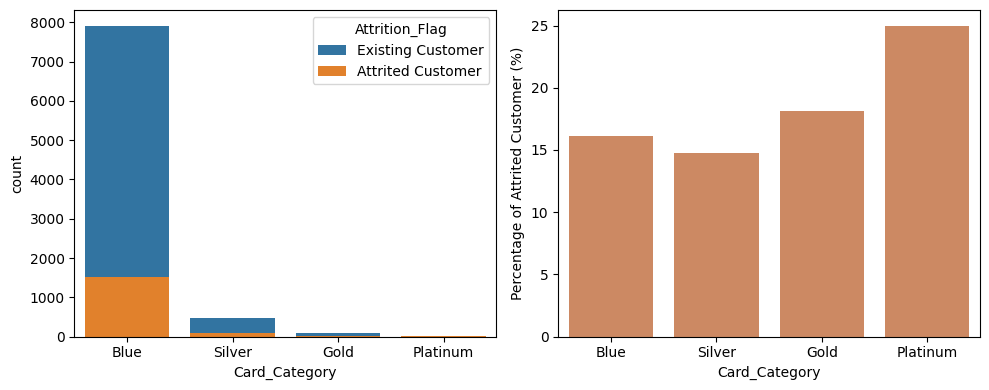

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Plot by count
sns.countplot(data=df, 
                x='Card_Category', 
                hue="Attrition_Flag", 
                dodge=False,
                order=['Blue','Silver','Gold','Platinum'],
                ax=ax[0])

# Plot by percentage
proportions = df.groupby('Card_Category')['Attrition_Flag'].value_counts(normalize=True).unstack() * 100
sns.barplot(x=proportions.index, 
        y=proportions['Attrited Customer'], 
        color='#dd8452',
        order=['Blue','Silver','Gold','Platinum'],
        ax=ax[1])
ax[1].set_ylabel('Percentage of Attrited Customer (%)')

plt.tight_layout()
plt.show()

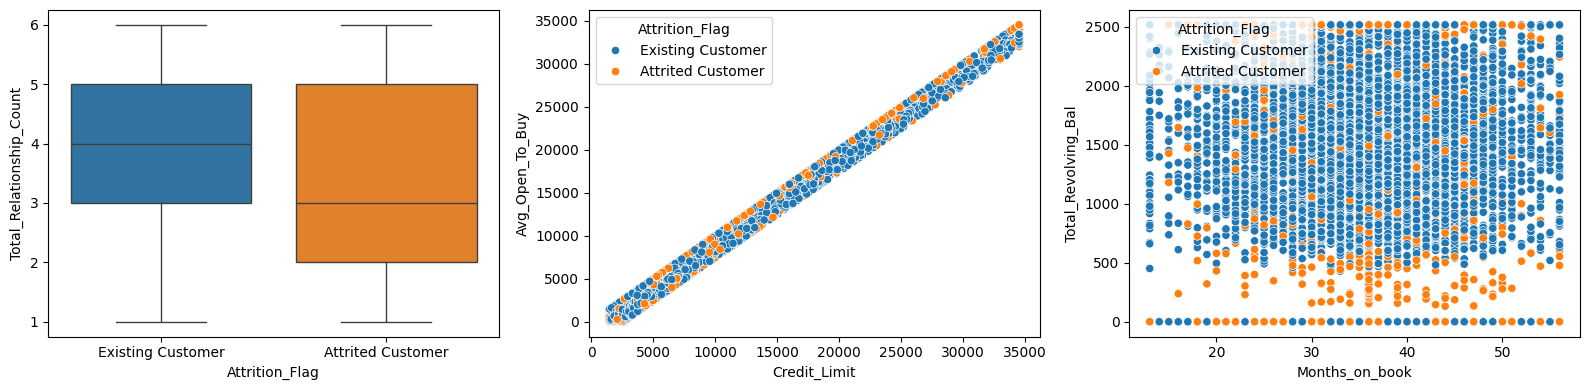

In [9]:
# Plot by percentage
fig, ax = plt.subplots(1, 3, figsize=(16,4))

sns.boxplot(x='Attrition_Flag', 
            y='Total_Relationship_Count',
            hue='Attrition_Flag', 
            data=df,
            ax=ax[0])

sns.scatterplot(
    x='Credit_Limit', 
    y='Avg_Open_To_Buy',
    hue='Attrition_Flag',
    data=df,
    ax=ax[1])

sns.scatterplot(
    x='Months_on_book', 
    y='Total_Revolving_Bal',
    hue='Attrition_Flag',
    data=df,
    ax=ax[2])

plt.tight_layout()
plt.show()

1. **Card Type** : 
<br>Majority of the customers hold Blue credit cards (entry-level), while Platinum cardholders are the least common. However, Platinum cardholders have the highest attrition rate, suggesting that high-value customers may be more likely to switch if their needs are not met, possibly due to dissatisfaction with services or a lack of competitive offerings.</br>
2. **Total Number of Products Hold** : 
<br>Customers with fewer products are more likely to attrit, indicating that customers who are more engaged and have a broader relationship with the bank are less likely to leave. This suggests that increasing product offerings could be a strategy to enhance customer retention.</br>
3. **Average Open To Buy Credit Line and Credit Limit**: 
<br>Average open-to-buy credit line is highly dependent on the credit limit. Attrited customers tend to have higher open to buy credit lines relative to their credit limits. This may suggest that customers with higher available credit are more likely to attrit, potentially due to financial difficulties or shifting to more favorable financial products elsewhere.</br>
4. **Total Revolving Balance and Duration of Relationship**: 
<br>Customers with lower total revolving balances are more likely to attrit, highlighting that less engaged customers with minimal credit usage are at a higher risk of leaving. Additionally, the duration of relationship with the bank seems to have little impact on attrition as the distribution of attrited customers is fairly consistent across all duration.</br>

### Usage and Transaction Behaviour

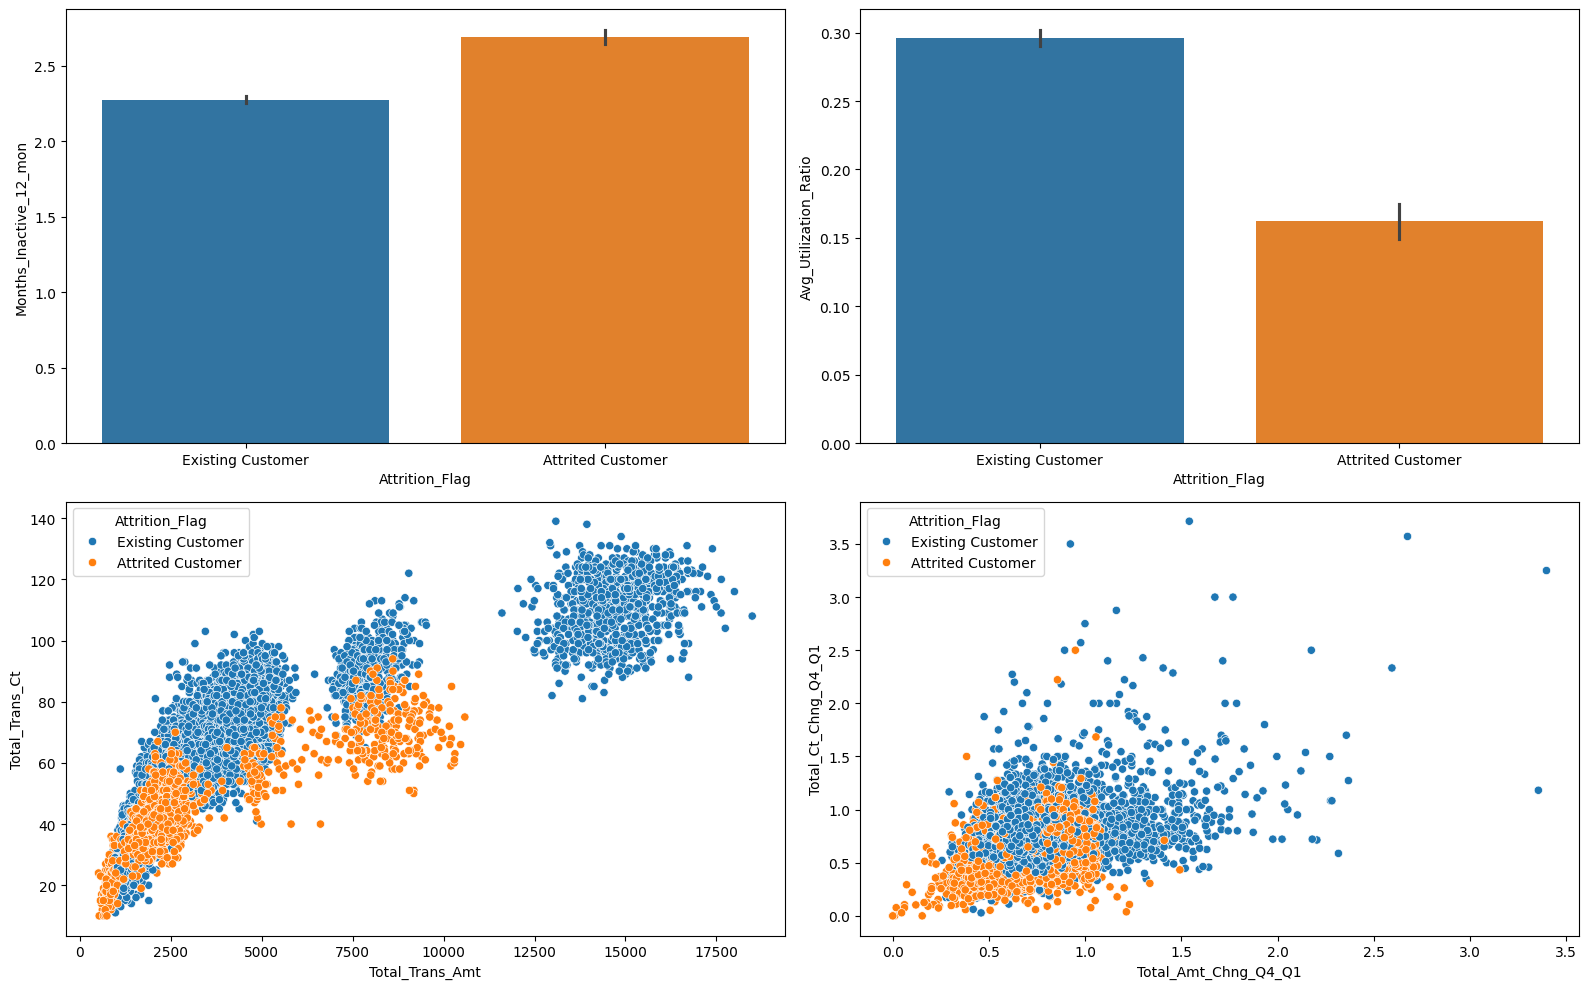

In [10]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

sns.barplot(x='Attrition_Flag', 
            y='Months_Inactive_12_mon',
            hue='Attrition_Flag', 
            data=df,
            ax=ax[0,0])

sns.barplot(x='Attrition_Flag', 
            y='Avg_Utilization_Ratio',
            hue='Attrition_Flag', 
            data=df,
            ax=ax[0,1])

sns.scatterplot(
    x='Total_Trans_Amt', 
    y='Total_Trans_Ct',
    hue='Attrition_Flag',
    data=df,
    ax=ax[1,0])

sns.scatterplot(
    x='Total_Amt_Chng_Q4_Q1', 
    y='Total_Ct_Chng_Q4_Q1',
    hue='Attrition_Flag',
    data=df,
    ax=ax[1,1])

plt.tight_layout()
plt.show()

1. **Period of Inactivity and Average Utilization Ratio**: 
<br>Attrited customers tend to have a longer average period of inactivity over the past 12 months and exhibit a lower average card utilization ratio compared to existing customers. This suggests that customers who are less engaged with their accounts and use their cards less frequently may be more likely to churn.</br>
2. **Total Transaction Count and Amount**: 
<br>The total transaction count is positively correlated with the total transactioin amount. Customers who exceed $12,000 in transaction amount are generally less likely to attrit, while those with lower transaction counts within the same transaction amount group are more prone to churn. This align with the previous analysis where less frequent transactions may increase the likelihood of attrition.</br>
3. **Change in Count and Amount** : 
<br>The change in transaction count is positively correlated with the change in transaction amount for Q4 over Q1. Customers who show no change or decline in either transaction amount or count are more likely to attrit, highlighting that a lack of activity or engagement in recent transactions could be an indicator of potential churn.</br>

### Correlation Heatmap

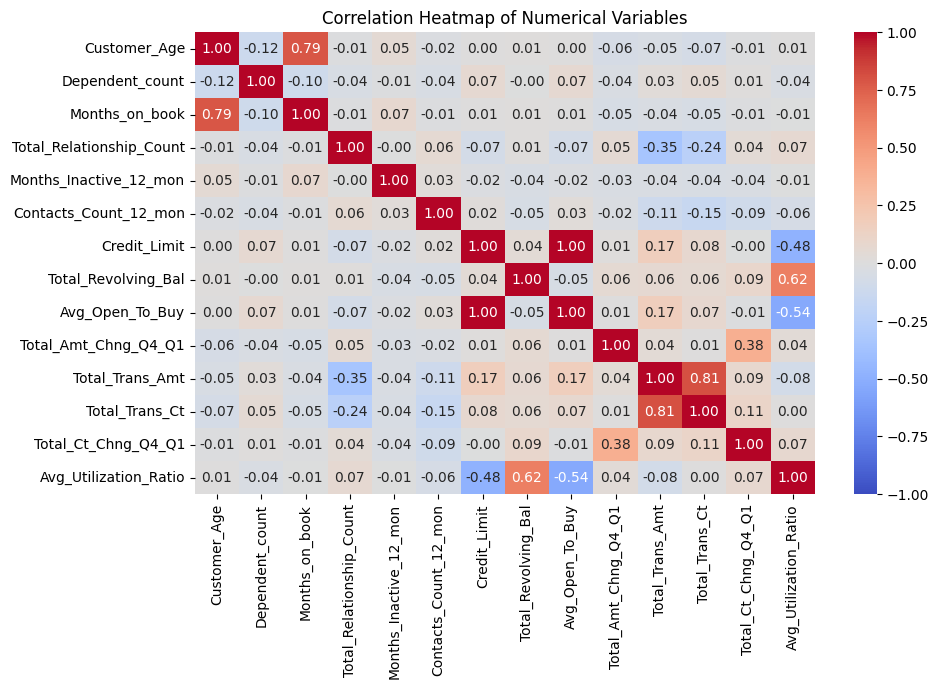

In [11]:
# Compute the correlation matrix on numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64']).iloc[:,1:]
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

As suggested by the above analyses and the correlation heatmap, the average open-to-buy credit line is perfectly correlated with the credit limit, and the total transaction amount shows a strong positive correlation with the total transaction count. 

The heatmap further reveals that customer age is strongly associated with the number of months in a relationship with the bank, likely reflecting a longer tenure as customers age. This suggests that older customers may be more loyal, and strategies to retain long-tenured customers could prove beneficial.

Additionally, the average utilization ratio is positively correlated with the total revolving balance but negatively correlated with both the credit limit and the average open to buy credit line. This indicates that customers with higher revolving balances are more likely to utilize their credit lines more fully. However, lower credit limits may limit utilization, which could lead to lower customer engagement. As such, revising credit limits for certain customers could improve their engagement and reduce attrition.

## Data Pre-Processing
### Data Cleaning
1. Remove CLIENTNUM field which is the unique identifiers of the customers.
2. Remove Avg_Open_To_Buy due to perfect correlation with Credit_Limit.
3. Remove rows with unknown education and income.
4. Convert ordinal categorical variables to numerical values.
5. One-hot encode nominal categorical variables and drop one dummy column to avoid multicollinearity.

In [12]:
# Remove CLIENTNNUM
df1 = df.drop(["CLIENTNUM","Avg_Open_To_Buy"], axis=1)

# Remove data with unknown education and income
df1 = df1[(df1['Education_Level']!='Unknown') & (df1['Income_Category']!='Unknown')]

In [13]:
# Convert education level to numerical
education_mapping = {'Uneducated': 0,'High School': 1,'College': 2,'Graduate': 3,'Post-Graduate': 4,'Doctorate': 5}
df1['Education_Level'] = df1['Education_Level'].map(education_mapping)

# Convert Income category to numerical
income_mapping = {'Less than $40K': 0,'$40K - $60K': 1,'$60K - $80K': 2, '$80K - $120K': 3, '$120K +': 4}
df1['Income_Category'] = df1['Income_Category'].map(income_mapping)

# Convert card category to numerical
card_category_mapping = {'Blue': 0,'Silver': 1,'Gold': 2,'Platinum': 3}
df1['Card_Category'] = df1['Card_Category'].map(card_category_mapping)

In [14]:
# Convert categorical variables to dummy variables and remove the last columns for each categorical variable
df1 = pd.get_dummies(df1)
df1 = df1.drop(['Attrition_Flag_Existing Customer','Gender_M','Marital_Status_Unknown'], axis=1)

# Convert boolean type to int
df1.iloc[:, 16:] = df1.iloc[:, 16:].astype('int64')

# Rename the classification column
df1 = df1.rename(columns = {'Attrition_Flag_Attrited Customer':'Attrition'})
X = df1.drop(['Attrition'], axis=1)

### Standardization

In [15]:
# Standardize data
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

### Split to Train and Test Set
Randomly splitting dataset to train and test set where 70% of the data is assigned to the train set and the remaining 30% is assigned to the test set.

In [16]:
# Split data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X_standardized, df1['Attrition'], test_size=0.3, random_state=123)

# Dimensionality Reduction
The dataset will first undergo dimensionality reduction using different methods on the training data with all features included. We will evaluate the explained variance ratio for each component and select the minimum number of components required to explain at least 80% of the cumulative variance. 

The dimensionality reduction model is fitted with the selected number of components to compress the data into the desired number of dimensions and ensuring maximal information retention in the lower-dimensional space. We will assess the model performance by calculating the reconstruction error on both the train and test sets. This will help us evaluate the model's ability to minimize reconstruction error in the training data while ensuring it generalizes well to the test data.

In this approach, we aim to strike a balance between representability and complexity to optimize the trade-off between preserving information and reducing dimensionality. By setting the threshold for the explained variance at 80%, we ensure that the reduced dimensionality retains a significant amount of the data's variance while minimizing the complexity introduced by too many components. 

In [17]:
# Function to plot the variance
def variance_plot(variance, x_value):
    fig, ax = plt.subplots(1, 2, figsize=(9,4))

    # Plot individual explained variance
    ax[0].plot(variance, marker='o')
    ax[0].set_xlabel('Number of Components')
    ax[0].set_ylabel('Individual Explained Variance Ratio')
    ax[0].legend()

    # Plot cumulative explained variance
    ax[1].plot(variance.cumsum(), marker='o')
    ax[1].axvline(x=x_value, c='r', ls='--')
    ax[1].axhline(y=0.8, c='g', ls=':', label = f'threshold')
    ax[1].axhline(y=variance.cumsum()[x_value], c='r', ls='--', label = f'total variance={variance.cumsum()[x_value]:.3g}')
    ax[1].set_xlabel('Number of Components')
    ax[1].set_ylabel('Cumulative Explained Variance Ratio')
    ax[1].legend()

    plt.tight_layout()
    plt.show()  

In [18]:
# Function to compute reconstruction error 
def error(X_reconstructed_train, X_reconstructed_test):
    reconstruction_error_train = mean_squared_error(X_train, X_reconstructed_train)
    reconstruction_error_test = mean_squared_error(X_test, X_reconstructed_test)
    print(f"train reconstruction error: {reconstruction_error_train}")
    print(f"test reconstruction error: {reconstruction_error_test}") 
    return reconstruction_error_train,reconstruction_error_test

In [19]:
# Funtion to reconstruct data and return reconstruction erro for PCA and kernel PCA models
def rec_error(model):
    # Fit model on train and test data
    X_train_model = model.transform(X_train)
    X_test_model = model.transform(X_test)

    # Reconstruct the data
    model_reconstructed_train = model.inverse_transform(X_train_model)
    model_reconstructed_test = model.inverse_transform(X_test_model)

    # Calculate reconstruction error
    reconstruction_error_train,reconstruction_error_test = error(model_reconstructed_train, model_reconstructed_test) 
    return reconstruction_error_train,reconstruction_error_test

## Principle Component Analysis (PCA)


In [20]:
# Fit PCA on train data
pca = PCA()
pca.fit(X_train)

PCA()

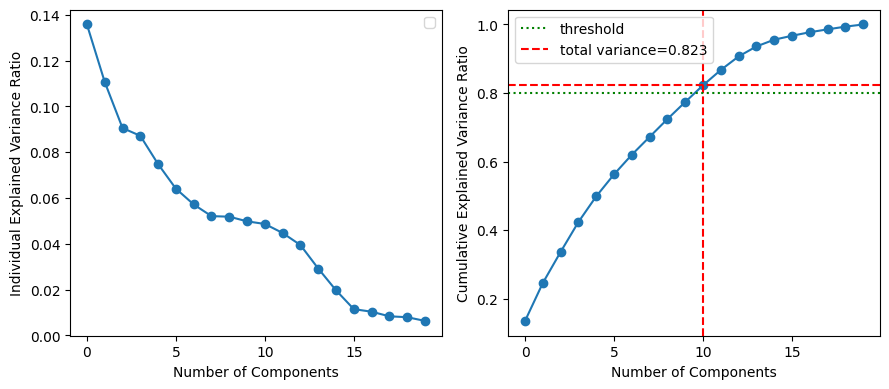

In [21]:
# Plot for individual explained and cumulative variance ratio
variance_plot(pca.explained_variance_ratio_, 10)

In [22]:
# Fit PCA with 10 components
pca = PCA(n_components=10)
pca.fit(X_train)

# Reconstruct the data and calculate reconstruction error
pca_train_error,pca_test_error = rec_error(pca)

train reconstruction error: 0.22414373900698106
test reconstruction error: 0.23493681595898566


## RBF Kernel PCA
We uses the default values for gamma and alpha in the Kernel PCA with an RBF kernel. The gamma parameter controls the kernel coefficient and is set to 1/n_features by default. This setting determines the influence of each data point on others during the transformation process, where a higher gamma leads to a more localized influence. The alpha parameter is a regularization hyperparameter that learns the inverse transform and is set to 1 by default. This regularization helps prevent overfitting by controlling the complexity of the model while learning the inverse transformation for the reduced feature space.

In [23]:
# Fit RBF kernel PCA on train data with 20 dimensions
rbfkernel_pca = KernelPCA(n_components=20, kernel="rbf")
rbfkernel_pca.fit(X_train)

KernelPCA(kernel='rbf', n_components=20)

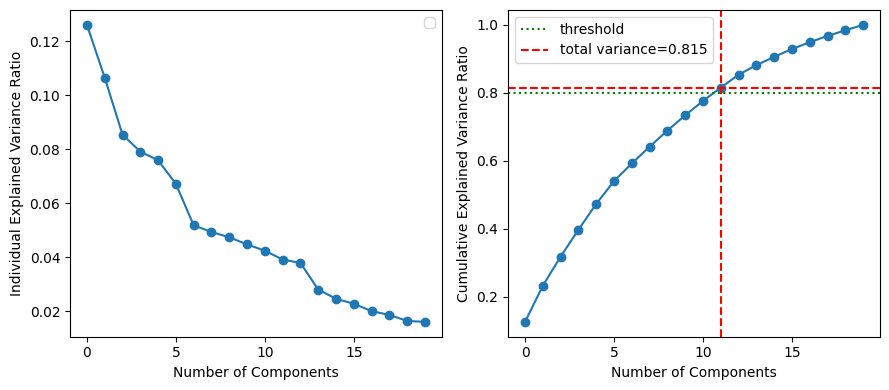

In [24]:
# Calculate explained variance ratio
kpca_explained_variance_ratio = rbfkernel_pca.eigenvalues_/np.sum(rbfkernel_pca.eigenvalues_)

# Plot for individual explained and cumulative variance ratio
variance_plot(kpca_explained_variance_ratio, 11)

In [25]:
# Fit RBF kernel PCA with 11 components
rbfkernel_pca = KernelPCA(n_components=11, kernel="rbf", fit_inverse_transform=True)
rbfkernel_pca.fit(X_train)

# Reconstruct the data and calculate reconstruction error
gkpca_train_error,gkpca_test_error = rec_error(rbfkernel_pca)

train reconstruction error: 0.2917718761632195
test reconstruction error: 0.3181471651305458


## Linear Kernel PCA
Similar to RBF kernel PCA, we will use the default value for the alpha parameter.

In [26]:
# Fit linear RBF kernel PCA on train data with 20 dimensions
linearkernel_pca = KernelPCA(n_components=20, kernel="linear")
linearkernel_pca.fit(X_train)

KernelPCA(n_components=20)

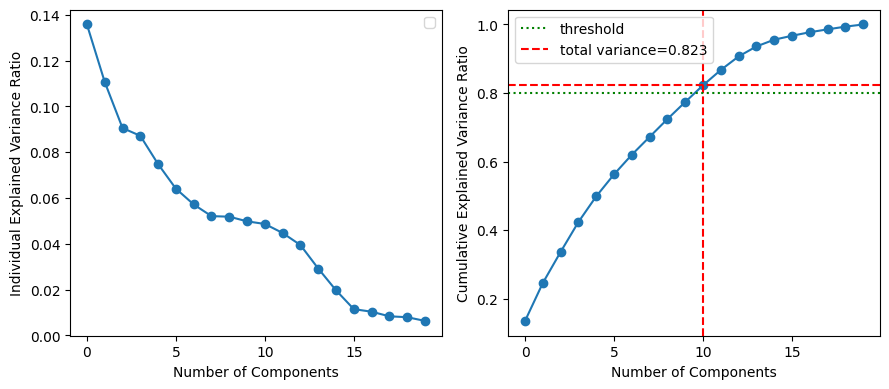

In [27]:
# Calculate explained variance ratio
kpca_explained_variance_ratio = linearkernel_pca.eigenvalues_/np.sum(linearkernel_pca.eigenvalues_)

# Plot for individual explained and cumulative variance ratio
variance_plot(kpca_explained_variance_ratio,10)

In [28]:
# Fit linear kerel pca with 10 components
linearkernel_pca = KernelPCA(n_components=10, kernel="linear", fit_inverse_transform=True)
linearkernel_pca.fit(X_train)

# Reconstruct the data and calculate reconstruction error
lkpca_train_error,lkpca_test_error = rec_error(linearkernel_pca)

train reconstruction error: 0.22419570226304325
test reconstruction error: 0.23484701954799872


## Autoencoder
A neural network autoencoder is constructed to encode and decode the original dataset, reducing the initial 20 features into a lower-dimensional latent representation. This model consists of two hidden layers with 60 and 40 nodes respectively, both using the LeakyReLU activation function. This activation function is chosen to mitigate the risk of dead neurons by allowing a small, non-zero gradient for negative input. The latent layer uses a linear activation function to enable a continuous range of values for the compressed representation. In the decoding phase, the network reverses this structure, gradually reconstructing the data back to its original 20 features through a final output layer with 20 nodes and a linear activation function.

The autoencoder is trained using the Adam optimizer with Mean Squared Error (MSE) as the loss function. The model is trained on the training set for 50 epochs with a batch size of 300, and 20% of the data is reserved as the validation set to monitor performance during training. The increasing number of nodes in the hidden layers is designed to capture complex patterns in the data.

In [29]:
# Function for the autoencoder
def autoencoder(reduced_dim):
    
    # Initialize weights using GlorotUniform
    initializer = GlorotUniform(seed=321)

    # Define the input layer
    input_layer = Input(shape=(20,))

    # Define the encoder
    hidden_layer_1 = Dense(60, activation=LeakyReLU(alpha=0.1), name='hidden_layer_1', kernel_initializer=initializer)(input_layer)
    hidden_layer_2 = Dense(40, activation=LeakyReLU(alpha=0.1), name='hidden_layer_2',kernel_initializer=initializer)(hidden_layer_1)
    encoded_representation = Dense(reduced_dim, activation='linear', name='latent_layer',kernel_initializer=initializer)(hidden_layer_2)

    # Define the decoder
    hidden_layer_3 = Dense(40, activation=LeakyReLU(alpha=0.1), name='hidden_layer_3',kernel_initializer=initializer)(encoded_representation)
    hidden_layer_4 = Dense(60, activation=LeakyReLU(alpha=0.1), name='hidden_layer_4',kernel_initializer=initializer)(hidden_layer_3)
    output_layer = Dense(20, activation='linear', name='output_layer',kernel_initializer=initializer)(hidden_layer_4)

    # Create the autoencoder model
    autoencoder = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    autoencoder.compile(optimizer='adam', loss='mse')
    
    # Train the autoencoder
    autoencoder.fit(X_train, X_train, epochs=50, batch_size=300, shuffle = False, validation_split=0.2) 

    return autoencoder


In [30]:
# Fit autoencoder on train data with 20 dimensions
full_autoencoder = autoencoder(20)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 1.0180 - val_loss: 0.9080
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8632 - val_loss: 0.7532
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6945 - val_loss: 0.5806
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5305 - val_loss: 0.4505
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4148 - val_loss: 0.3606
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3336 - val_loss: 0.2924
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2759 - val_loss: 0.2531
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2393 - val_loss: 0.2197
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2078 - val_loss: 0.1917
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1818 - val_loss: 0.1678
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1601 - val_loss: 0.1480
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1411 - val_l

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step


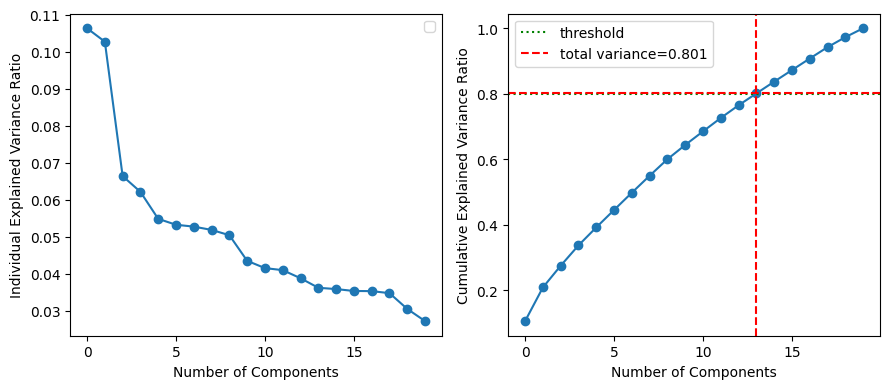

In [31]:
# Encode the data
encoder = Model(inputs=full_autoencoder.input, outputs=full_autoencoder.get_layer("latent_layer").output)
X_train_encoded = encoder.predict(X_train)

# Calculate explained variance ratio
encoded_variance = np.var(X_train_encoded, axis=0)
explained_variance_ratio = encoded_variance / np.sum(encoded_variance)
sorted_explained_variance_ratio = np.sort(explained_variance_ratio)[::-1]

# Plot for individual explained and cumulative variance ratio
variance_plot(sorted_explained_variance_ratio,13)

In [32]:
# Fit autoencoder with 13 components
reduced_autoencoder = autoencoder(13)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.9943 - val_loss: 0.9055
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8620 - val_loss: 0.7579
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7140 - val_loss: 0.6205
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5860 - val_loss: 0.5124
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4816 - val_loss: 0.4350
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4076 - val_loss: 0.3687
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3472 - val_loss: 0.3142
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2979 - val_loss: 0.2738
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2607 - val_loss: 0.2404
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2286 - val_loss: 0.2111
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2008 - val_loss: 0.1867
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1791 - val_l

In [33]:
# Reconstruct the data and calculate reconstruction error
autoenc_reconstructed_train = reduced_autoencoder.predict(X_train)
autoenc_reconstructed_test = reduced_autoencoder.predict(X_test)
autoenc_train_error,autoenc_test_error = error(autoenc_reconstructed_train, autoenc_reconstructed_test)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step
train reconstruction error: 0.05778676495571221
test reconstruction error: 0.06034033090173955


## Comparison on Dimensionality Reduction Model Performance

In [34]:
errors = pd.DataFrame({"Train Reconstruction Error": [pca_train_error,lkpca_train_error,gkpca_train_error,autoenc_train_error],
                       "Test Reconstruction Error": [pca_test_error,lkpca_test_error,gkpca_test_error,autoenc_test_error]})
errors

,Train Reconstruction Error,Test Reconstruction Error
0,0.224144,0.234937
1,0.224196,0.234847
2,0.291772,0.318147
3,0.057787,0.060340


To reach the 80% cumulative explained variance threshold, PCA and linear kernel PCA require a minimum of 10 components, RBF kernel PCA needs 11 components, and the autoencoder requires 13 components. The autoencoder's slightly higher dimensional requirement compared to the PCA methods reflects its non-linear approach, which can capture complex relationships in the data that PCA methods cannot.

Based on the reconstruction error table above, the autoencoder achieves the best performance in dimensionality reduction, having the lowest reconstruction error on both train and test sets. The close similarity between the train and test reconstruction error indicates strong generalization to unseen data. Although the autoencoder requires slightly more components than PCA methods, this additional dimensionality allows it to effectively capture complex relationships within the data, leading to a lower reconstruction error and improved representation quality.

## Correlation Between Original and Latent Features
The 13 latent features obtained through the autoencoder are assessed by computing a correlation matrix with the original features. This analysis aims to understand how the compressed latent features relate to the original data attributes, providing insight into which aspects of the original data structure are preserved. Strong correlations between specific latent and original features may indicate that these latent features capture essential patterns or characteristics from the original dimensions, while lower correlations could suggest areas where the autoencoder has identified new or complex relationships not easily represented in the original features alone.

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step


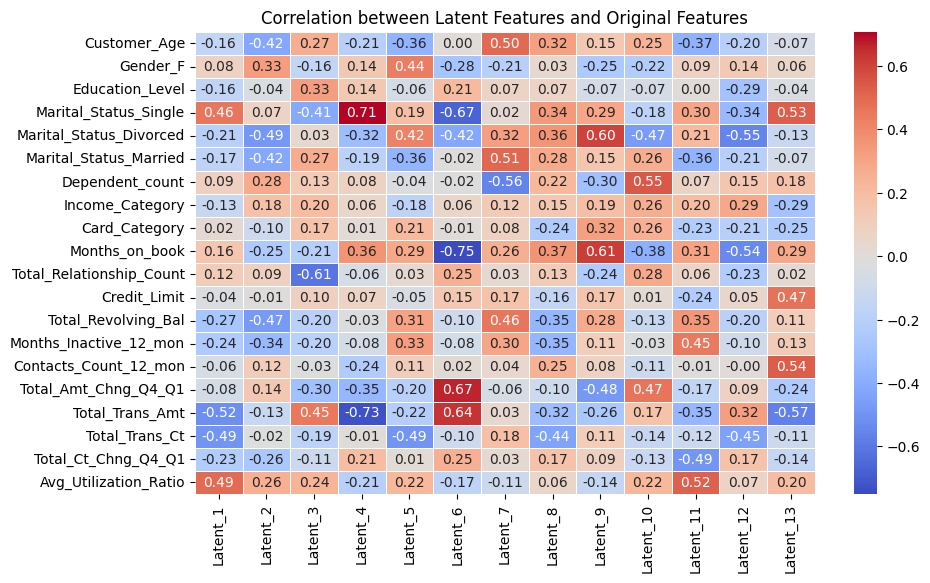

In [35]:
# Get the reduced train data from autoencoder
reduced_encoder = Model(inputs=reduced_autoencoder.input, outputs=reduced_autoencoder.get_layer("latent_layer").output)
encoded_X_train = reduced_encoder.predict(X_train)
encoded_X_test = reduced_encoder.predict(X_test)

# Prepare latent and original features
columns = ['Customer_Age', 'Gender_F', 'Education_Level', 'Marital_Status_Single', 'Marital_Status_Divorced', 'Marital_Status_Married',
           'Dependent_count', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Credit_Limit',
           'Total_Revolving_Bal', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
           'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

latent_df = pd.DataFrame(encoded_X_train, columns=[f'Latent_{i+1}' for i in range(encoded_X_train.shape[1])])
original_df = pd.DataFrame(X_train, columns=columns) 
combined_df = pd.concat([original_df, latent_df], axis=1)

# Compute correlation matrix
correlation_matrix = combined_df.corr()

# Extract only the correlations between original features and latent features
latent_columns = latent_df.columns
original_columns = original_df.columns
cross_correlation_matrix = correlation_matrix.loc[original_columns, latent_columns]

# Plot the cross-correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(cross_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation between Latent Features and Original Features")
plt.show()

# Classification
Multiple classification models are trained on both the original training data and the reduced training data derived from the autoencoders. Since the target classes (attrition) in the dataset is imbalance, `class_weight='balanced'` is included during model training to address the class imbalance issue and improve fairness in classification.

Model evaluation is conducted using log-loss, which measures how close the prediction probability is to the corresponding actual class labels, with higher log-loss value indicating  greater divergence from the actual class. Cross-validation with 10 folds is applied on the training set to provide an average log-loss score  providing a robust assessment of each model's performance. Log-loss is also calculated separately on the test set for both the models trained with both original and reduced features.

This allows for a direct comparison of model perfomance in the different classification models, as well as the impact of dimensionality reduction. The test set log-loss scores further demonstrate each model's ability to generalize to unseen data, ensuring a comprehensive evaluation of model effectiveness.

In [36]:
# Function to calcualte log-loss scores
def logloss(model,X_traindata,X_testdata):
    # Define log_loss as a scorer for cross-validation
    log_loss_scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

    # Perform cross-validation with log loss scoring
    cv_results_train = cross_validate(model, X_traindata, y_train, cv=10, scoring=log_loss_scorer, return_train_score=False)

    # Calculate the log-loss on test data
    y_test_prob = model.predict_proba(X_testdata)[:, 1] 
    test_loss = log_loss(y_test, y_test_prob)

    return cv_results_train,test_loss

# Plot cross-validation log-loss distribution for train data and print for test data
def plot_loss(model,reduced_model):
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    # Caclulate and plot cross-validation train log-loss distribution
    cv_results_train,test_loss = logloss(model,X_train,X_test)
    train_loss = np.mean(cv_results_train['test_score'])
    sns.distplot(-cv_results_train['test_score'], label="Train Log-Loss",ax=ax[0])
    ax[0].axvline(-train_loss, color='red', linestyle='--', label=f"Mean: {-train_loss:.4f}")
    ax[0].legend()

    # Calculate and plot cross-validation reduced train log-loss distribution
    cv_results_train_r,test_loss_r = logloss(reduced_model,encoded_X_train,encoded_X_test)
    train_loss_r = np.mean(cv_results_train_r['test_score'])
    sns.distplot(-cv_results_train_r['test_score'], label="Reduced Train Log-Loss",ax=ax[1])
    ax[1].axvline(-train_loss_r, color='red', linestyle='--', label=f"Mean: {-train_loss_r:.4f}")
    ax[1].legend()
    plt.show()

    # Print log-loss scores for test and reduced test set
    print(f"Log-Loss for test set: {test_loss}")
    print(f"Log-Loss for reduced test set: {test_loss_r}")
    return train_loss,test_loss,train_loss_r,test_loss_r

## Logistic Regression

In [37]:
def LR():
    # Fit model with full train data
    model = LogisticRegression(class_weight='balanced',random_state=123)
    model.fit(X=X_train, y=y_train)

    # Fit model with reduced train data
    reduced_model = LogisticRegression(class_weight='balanced',random_state=123)
    reduced_model.fit(X=encoded_X_train, y=y_train)   

    # Plot cross-validation log-loss distribution for train data and print for test data
    train_loss,test_loss,train_loss_r,test_loss_r = plot_loss(model,reduced_model)

    return model,reduced_model,train_loss,test_loss,train_loss_r,test_loss_r

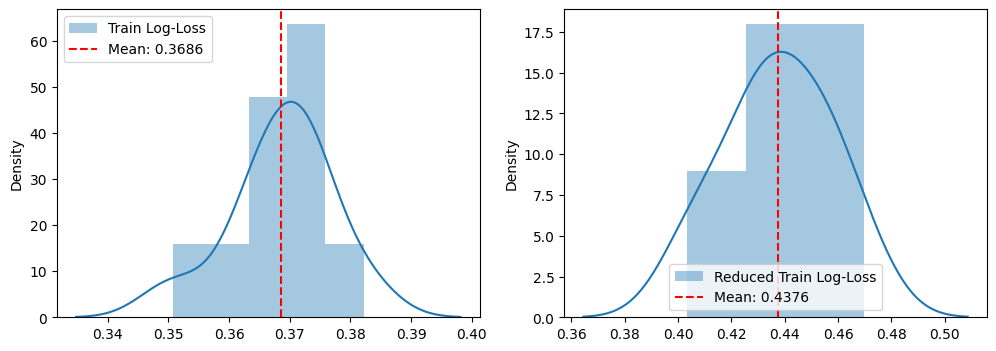

Log-Loss for test set: 0.36302192800122923
Log-Loss for reduced test set: 0.4364510436015722


In [38]:
lr_model_full,lr_model_reduced,lr_train_loss,lr_test_loss,lr_train_loss_r,lr_test_loss_r = LR()

## RBF Support Vector Machine

In [39]:
def SVM(kernel_type):
    # Fit model with full train data
    model = SVC(kernel=kernel_type,class_weight='balanced',probability=True,random_state=123)
    model.fit(X=X_train, y=y_train)

    # Fit model with reduced train data
    reduced_model = SVC(kernel=kernel_type,class_weight='balanced',probability=True,random_state=123)
    reduced_model.fit(X=encoded_X_train, y=y_train)   

    # Plot cross-validation log-loss distribution for train data and print for test data
    train_loss,test_loss,train_loss_r,test_loss_r = plot_loss(model,reduced_model)
    
    return model,reduced_model,train_loss,test_loss,train_loss_r,test_loss_r

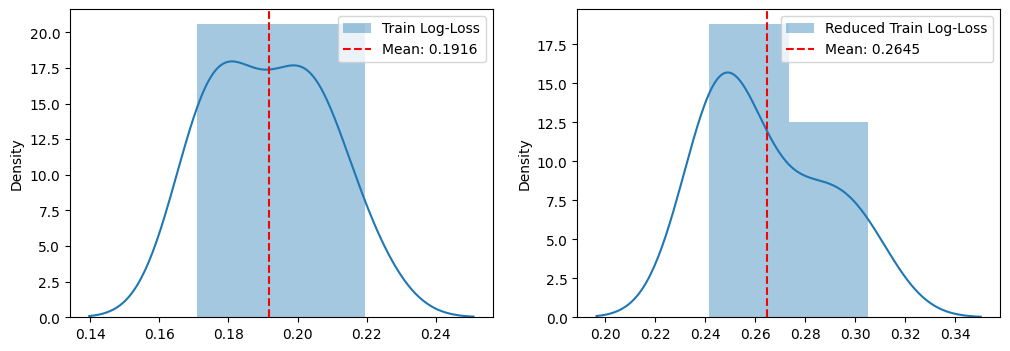

Log-Loss for test set: 0.17505734442146378
Log-Loss for reduced test set: 0.25001016435393963


In [40]:
rbfsvm_model_full,rbfsvm_model_reduced,rbfsvm_train_loss,rbfsvm_test_loss,rbfsvm_train_loss_r,rbfsvm_test_loss_r = SVM('rbf')

## Linear Support Vector Machine

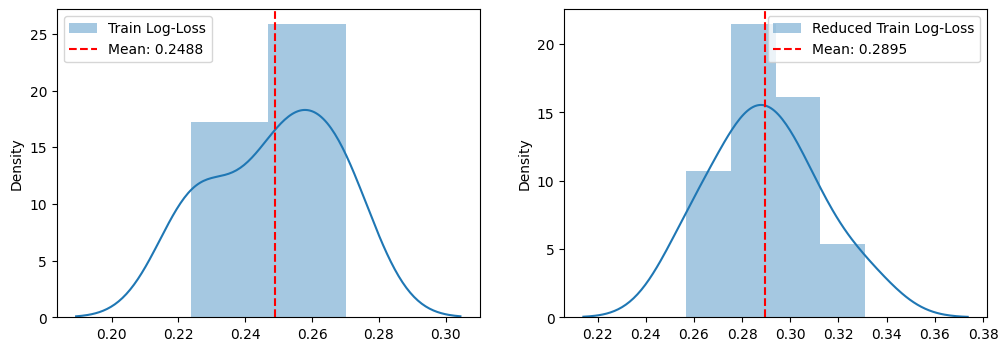

Log-Loss for test set: 0.2306595923840173
Log-Loss for reduced test set: 0.2744169192437614


In [41]:
linearsvm_model_full,linearsvm_model_reduced,lsvm_train_loss,lsvm_test_loss,lsvm_train_loss_r,lsvm_test_loss_r = SVM('linear')

## Decision Tree
The Decision Tree model undergoes an additional optimization step though grid search with 5-fold cross-validation to tune the `max_depth` (maximum depth of tree) hyperparameter. The grid search uses negative log-loss as the scoring metric, ensuring that the optimal model minimizes log-loss while balancing model complexity and performance. The decision tree model also uses log-loss to measure the quality of split, while other parameters remain at their defaults, such as choosing the best split and requiring a minimum of 2 samples to split an internal node.

After determining the best `max_depth` parameter, the Decision Tree model is then evaluated using the 10-fold cross-validation on the training set to compute the average log-loss score, consistent with the evaluation process for the other models. This two-step approach ensures that the Decision Tree model is both well-tuned and fairly comparable to other classification models.

In [42]:
def DT_model(X_traindata):
    # Train the classifier
    model = DecisionTreeClassifier(class_weight='balanced', criterion='log_loss', random_state=123) 
    model.fit(X=X_traindata,y=y_train)

    # Use GridSearchCV for hyperparameter tuning
    param_grid = {'max_depth': [3, 5, 7, 9]}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=1)
    grid_search.fit(X_traindata, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    return best_model

In [43]:
# Fit model with full and reduced train data
dt_model = DT_model(X_train)
dt_reduced_model = DT_model(encoded_X_train)
print(f"Decision Tree on Train Data:\n{dt_model.get_params()}")
print(f"Decision Tree on Reduced Train Data:\n{dt_reduced_model.get_params()}")

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Decision Tree on Train Data:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 123, 'splitter': 'best'}
Decision Tree on Reduced Train Data:
{'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 123, 'splitter': 'best'}


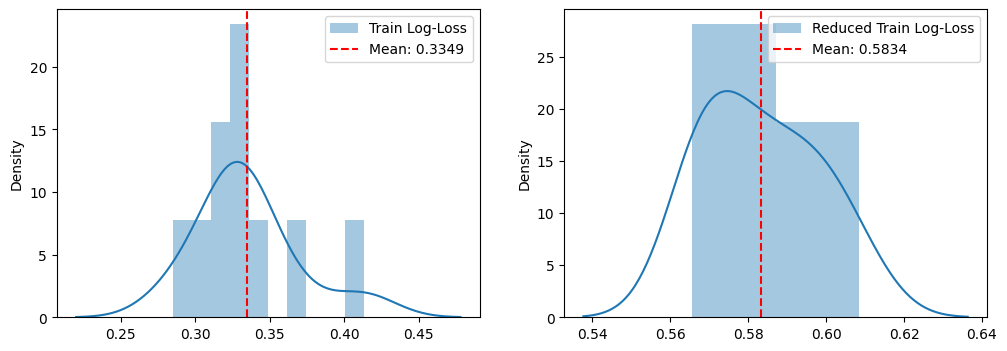

Log-Loss for test set: 0.3379155974155385
Log-Loss for reduced test set: 0.5630656048604851


In [44]:
# Plot cross-validation log-loss distribution for train data and print for test data
dt_train_loss,dt_test_loss,dt_train_loss_r,dt_test_loss_r = plot_loss(dt_model,dt_reduced_model)

### Decision Tree Visualization (Trained with Full Train Data)

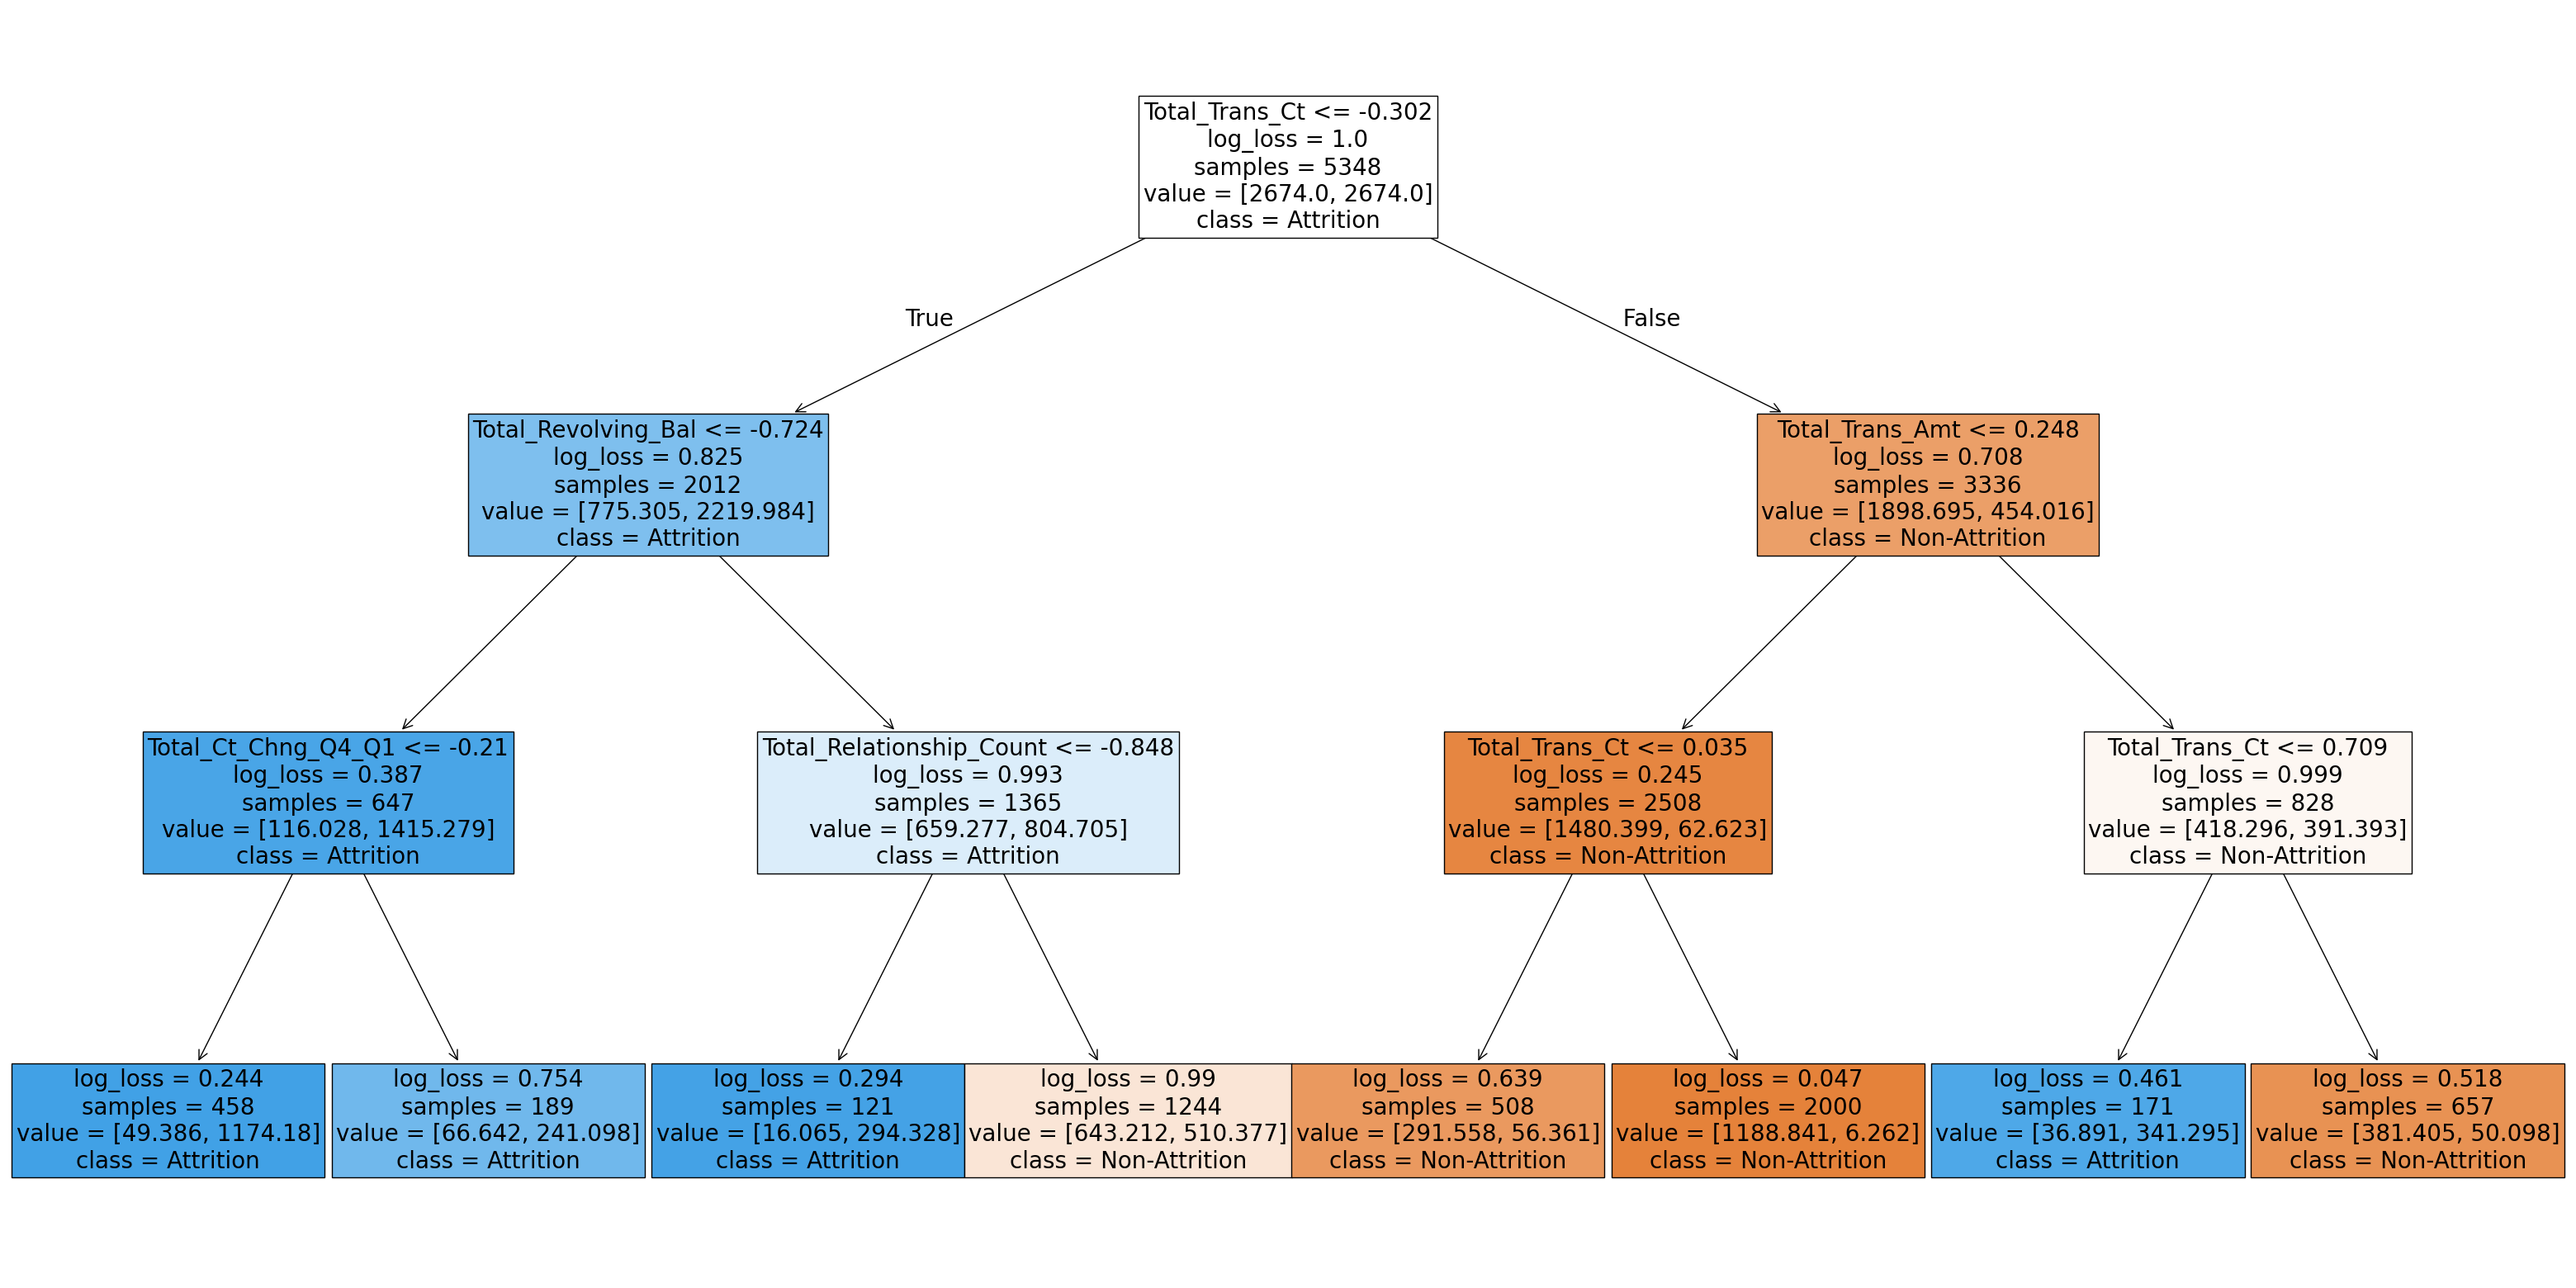

In [45]:
plt.figure(figsize=(40, 20))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Non-Attrition', 'Attrition'],
    filled=True,
    fontsize=20
);

Based on the Decision Tree model trained with the full training data, a tree with a depth of 3 emerged as the optimal model. The selected features for classification are primarily related to the customer's transaction and usage behavior, as well as account-related information. These include the total transaction count, total transaction amount, change in transaction count from Q4 to Q1, total revolving balance, and total relationship count. Interestingly, none of the selected features pertain to customer demographics, highlighting the importance of transaction behavior and account activity in predicting customer attrition.

### Decision Tree Visualization (Trained with Reduced Train Data)

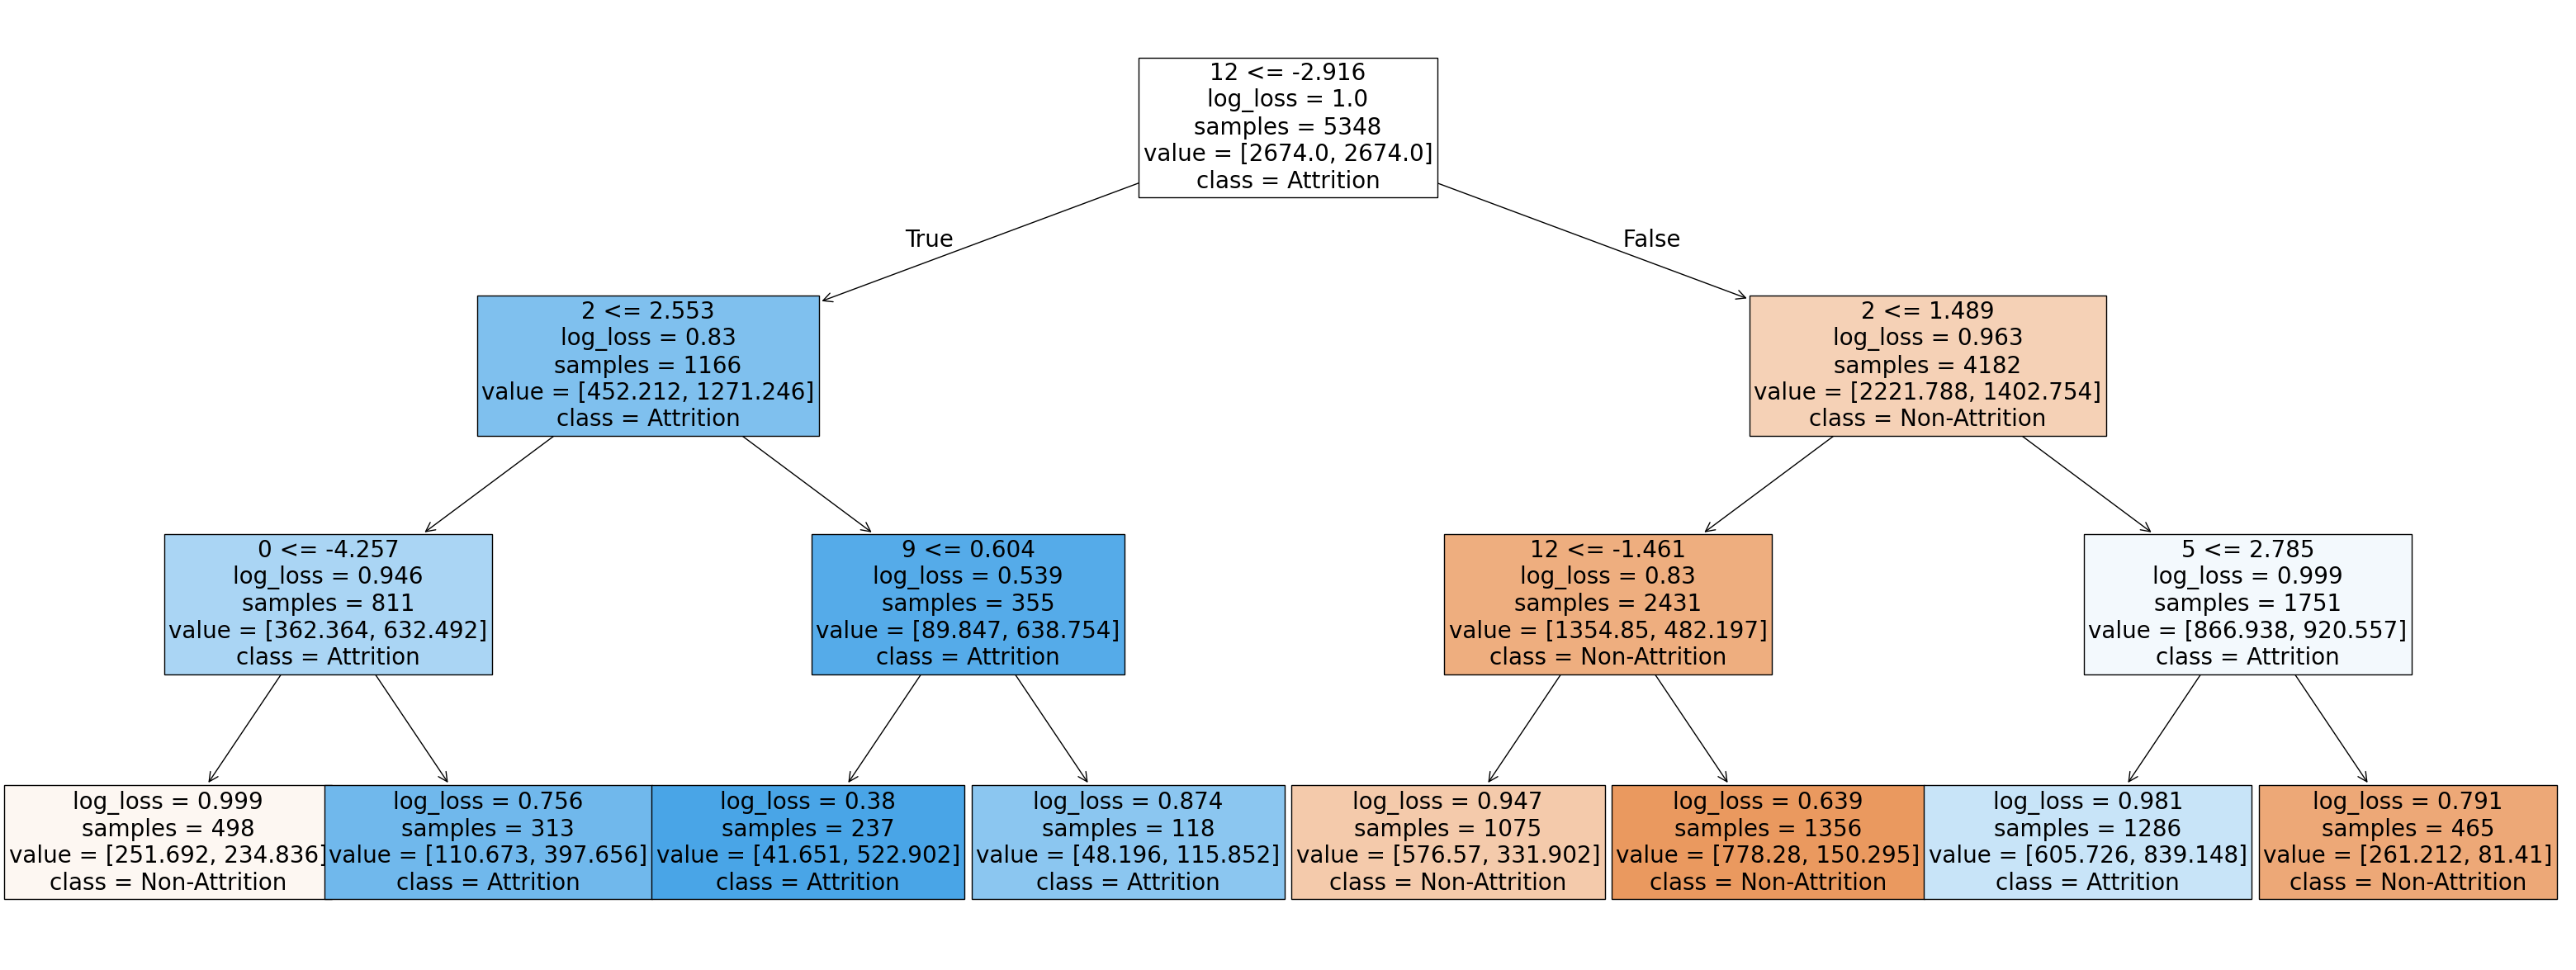

In [46]:
plt.figure(figsize=(40, 15))
encoded_X_train_df = pd.DataFrame(encoded_X_train)

plot_tree(
    dt_reduced_model,
    feature_names=encoded_X_train_df.columns,
    class_names=['Non-Attrition', 'Attrition'],
    filled=True,
    fontsize=20
);

Similar to the Decision Tree model trained with the full training data, the Decision Tree model trained with the reduced training data also identified a tree with depth 3 as the best model. The features used for classification in this case are the 0th, 2nd, 5th, 9th and 12th latent components. However, unlike the original feature-based model, the compressed latent features do not directly correlate to specific customer attributes, making it difficult to interpret exactly which aspects of the data contribute to the classification. 

## Random Forest

Random Forest fits a number of Decision Tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. Hence, Random Forest model follows a similar optimization approach as the Decision Tree model. The hyperparameters that tuned are `max_depth` (maximum depth of each tree) and `n_estimators` (number of trees in the forest), while other parameters are kept default similar to Decision Tree model.

In [47]:
def RF_model(X_traindata):
    # Train the classifier
    model = RandomForestClassifier(criterion='log_loss',class_weight='balanced', random_state=123) 
    model.fit(X=X_traindata,y=y_train)

    # Use GridSearchCV for hyperparameter tuning
    param_grid = {'max_depth': [3, 6, 9],
                  'n_estimators': [10, 20, 40]}
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1, verbose=1)
    grid_search.fit(X_traindata, y_train)
    
    # Get the best model from grid search
    best_model = grid_search.best_estimator_

    return best_model

In [48]:
# Fit model with full and reduced train data
rf_model = RF_model(X_train)
rf_reduced_model = RF_model(encoded_X_train)
print(f"Random Forest on Train Data:\n{rf_model.get_params()}")
print(f"Random Forest on Reduced Train Data:\n{rf_reduced_model.get_params()}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Random Forest on Train Data:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False}
Random Forest on Reduced Train Data:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'log_loss', 'max_depth': 9, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 40, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbos

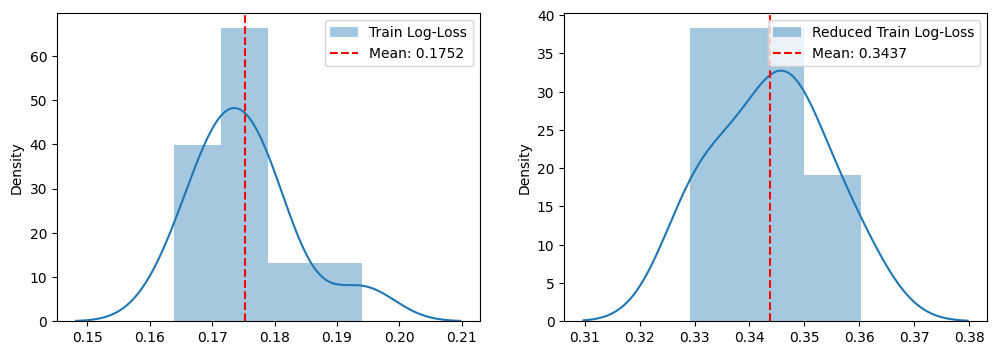

Log-Loss for test set: 0.1806139094158646
Log-Loss for reduced test set: 0.34030110597960855


In [49]:
# Plot cross-validation log-loss distribution for train data and print for test data
rf_train_loss,rf_test_loss,rf_train_loss_r,rf_test_loss_r = plot_loss(rf_model,rf_reduced_model)

The best Random Forest model, for both model trained on full training data and the reduced training data, was found to have a tree depth of 9 and 40 trees in the forest. This model has a better performance compared to the Decision Tree model, as evidenced by smaller log-loss values across all dataset: train, reduced train, test, and reduced test sets.

## Comparison on Classification Model Performance

In [50]:
loss = pd.DataFrame({"Model":["Logistic Regression","RBF SVM","Linear SVM","Decision Tree","Random Forest"],
                     "Train Average Log-Loss": [lr_train_loss,rbfsvm_train_loss,lsvm_train_loss,dt_train_loss,rf_train_loss],
                     "Reduced Train Average Log-Loss": [lr_train_loss_r,rbfsvm_train_loss_r,lsvm_train_loss_r,dt_train_loss_r,rf_train_loss_r],
                     "Test Log-Loss": [lr_test_loss,rbfsvm_test_loss,lsvm_test_loss,dt_test_loss,rf_test_loss],
                     "Reduced Test Log-Loss": [lr_test_loss_r,rbfsvm_test_loss_r,lsvm_test_loss_r,dt_test_loss_r,rf_test_loss_r]})
loss

,Model,Train Average Log-Loss,Reduced Train Average Log-Loss,Test Log-Loss,Reduced Test Log-Loss
0,Logistic Regression,-0.368635,-0.437597,0.363022,0.436451
1,RBF SVM,-0.191650,-0.264505,0.175057,0.250010
2,Linear SVM,-0.248757,-0.289512,0.230660,0.274417
3,Decision Tree,-0.334857,-0.583351,0.337916,0.563066
4,Random Forest,-0.175245,-0.343668,0.180614,0.340301


Generally, models trained with the full set of features perform better than those trained with the reduced set of features. A possible reason for this is that the compressed data obtained through dimensionality reduction with autoencoder may capture unnecessary complex relationships irrelevant to customer attrition, which can diminish the relevance of the more important features for classification. For instance, in the Decision Tree model trained on the full set of features, the important features for classification primarily stem from the usage and transaction behavior as well as account information. However, dimensionality reduction likely introduces relationships with less relevant features, such as customer demographics, diluting the impact of the essential features and reducing predictive power. Hence, an improvement can be achieved by applying dimensionality reduction selectively to subsets of features, focused only on features related to usage and transaction behavior or account information, as these are more directly relevant to customer attrition. This targeted approach may help preserve the most meaningful relationships in the reduced data, leading to improved classification performance.

Focusing on the models trained with the full set of features, Random Forest and RBF SVM emerge as the top performers, achieving the lowest log-loss scores on both the train and test sets compared to other models. While Random Forest achieves a lower log-loss on the train set, the RBF SVM achieves a lower log-loss on the test set, suggesting that RBF SVM may generalize better to unseen data. As a result, the RBF SVM model trained on the full set of features is considered the best model for classifying attrited and existing customers, providing the most robust and accurate predictions.